Uma arquiteta está começando a construir um shopping e tem alguns dados de prédios que ela construiu. Sabendo que você é expert em ciência de dados, ela te pediu para extrair alguma informação em relação a quantidade de potência do ar condicionado que ela vai precisar colocar no shopping, sabendo de informações como área de superficie, area do teto, altura e etc.

Como são dados coletados a mão, você deve se atentar a outliers que podem aparecer nos dados. Para fazer isso, você pode fazer o split 80/20 dos dados, realizar a regressão, calcular o R² dos dados. Após tudo isso, observe o gráfico dos resíduos para ver se tem algum valor muito diferente na distribuição e retirando-o dos dados, realize a regressão novamente e compare os valores dos coeficientes regressivos, RMSE e R².

In [324]:
# aqui vai as bibliotecas que você vai usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#essa biblioteca yellowbrick faz gráficos lindos para análise de modelos e recomendo você dar uma olhada
from yellowbrick.datasets import load_energy
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

Aqui já tem os dados que você precisa!

In [325]:
features = [
   "relative compactness",
   "surface area",
   "wall area",
   "roof area",
   "overall height",
   "orientation",
   "glazing area",
   "glazing area distribution",
   
]
target = [ "cooling load"]

df = load_energy(return_dataset=True).to_dataframe()
X, y = df[features], df[target]

In [326]:
y.head(3)

,cooling load
0,21.33
1,21.33
2,21.33


In [327]:
X.head(3)

,relative compactness,surface area,wall area,roof area,overall height,orientation,glazing area,glazing area distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0


In [328]:
df.head(3)

,relative compactness,surface area,wall area,roof area,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative compactness       768 non-null    float64
 1   surface area               768 non-null    float64
 2   wall area                  768 non-null    float64
 3   roof area                  768 non-null    float64
 4   overall height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing area               768 non-null    float64
 7   glazing area distribution  768 non-null    int64  
 8   heating load               768 non-null    float64
 9   cooling load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [330]:
df.describe()

,relative compactness,surface area,wall area,roof area,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Análise Gráfica


In [331]:
contColNames = list(df.select_dtypes(include=['number']).columns)
print(contColNames)

['relative compactness', 'surface area', 'wall area', 'roof area', 'overall height', 'orientation', 'glazing area', 'glazing area distribution', 'heating load', 'cooling load']


### Configurar subplot

In [332]:
ncols=3
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols)))
nrows

4

### Plotar Histogramas

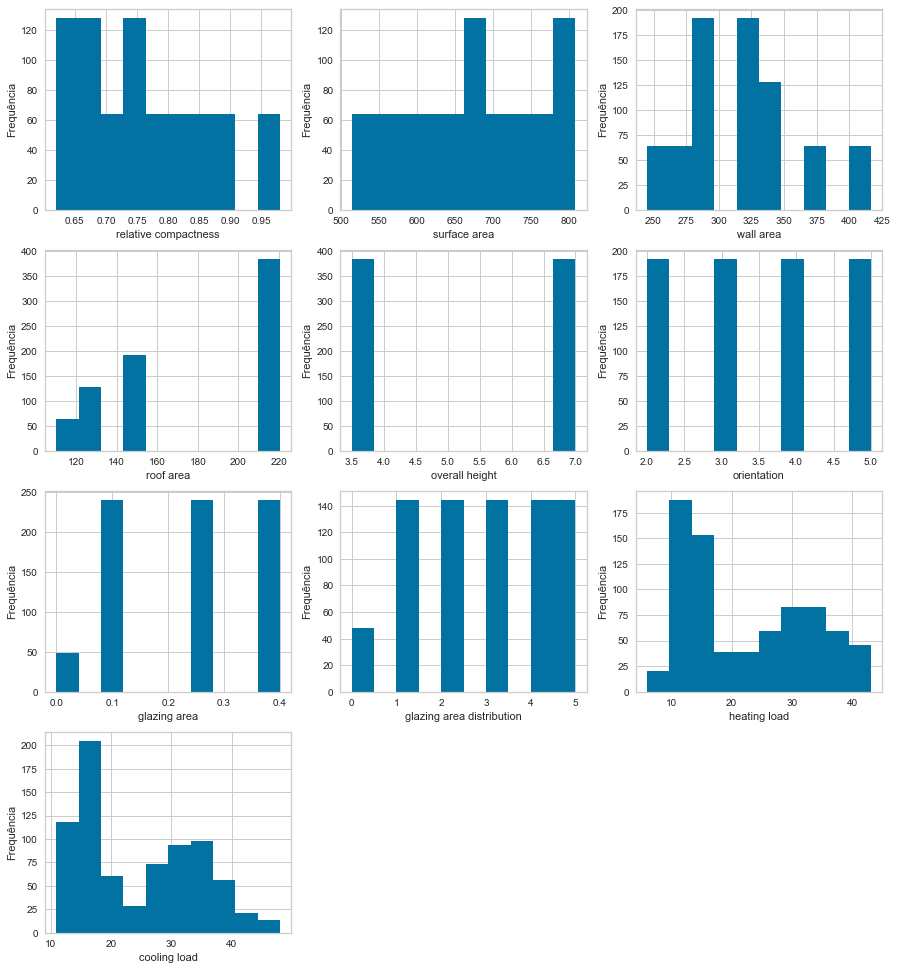

In [333]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,17))

counter = 0 

for i in range(nrows): # para cada linha
  for j in range(ncols): # plotar o número de colunas

    ax = axes[i][j]
    
    # print(i,j) #Só para ver os valores da linha e coluna.

    # Plotar somente quando houver dados
    if counter < len(contColNames):

      ax.hist(df.select_dtypes(include='number')[contColNames[counter]], bins=10)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

### Plotar gráfico de correlação

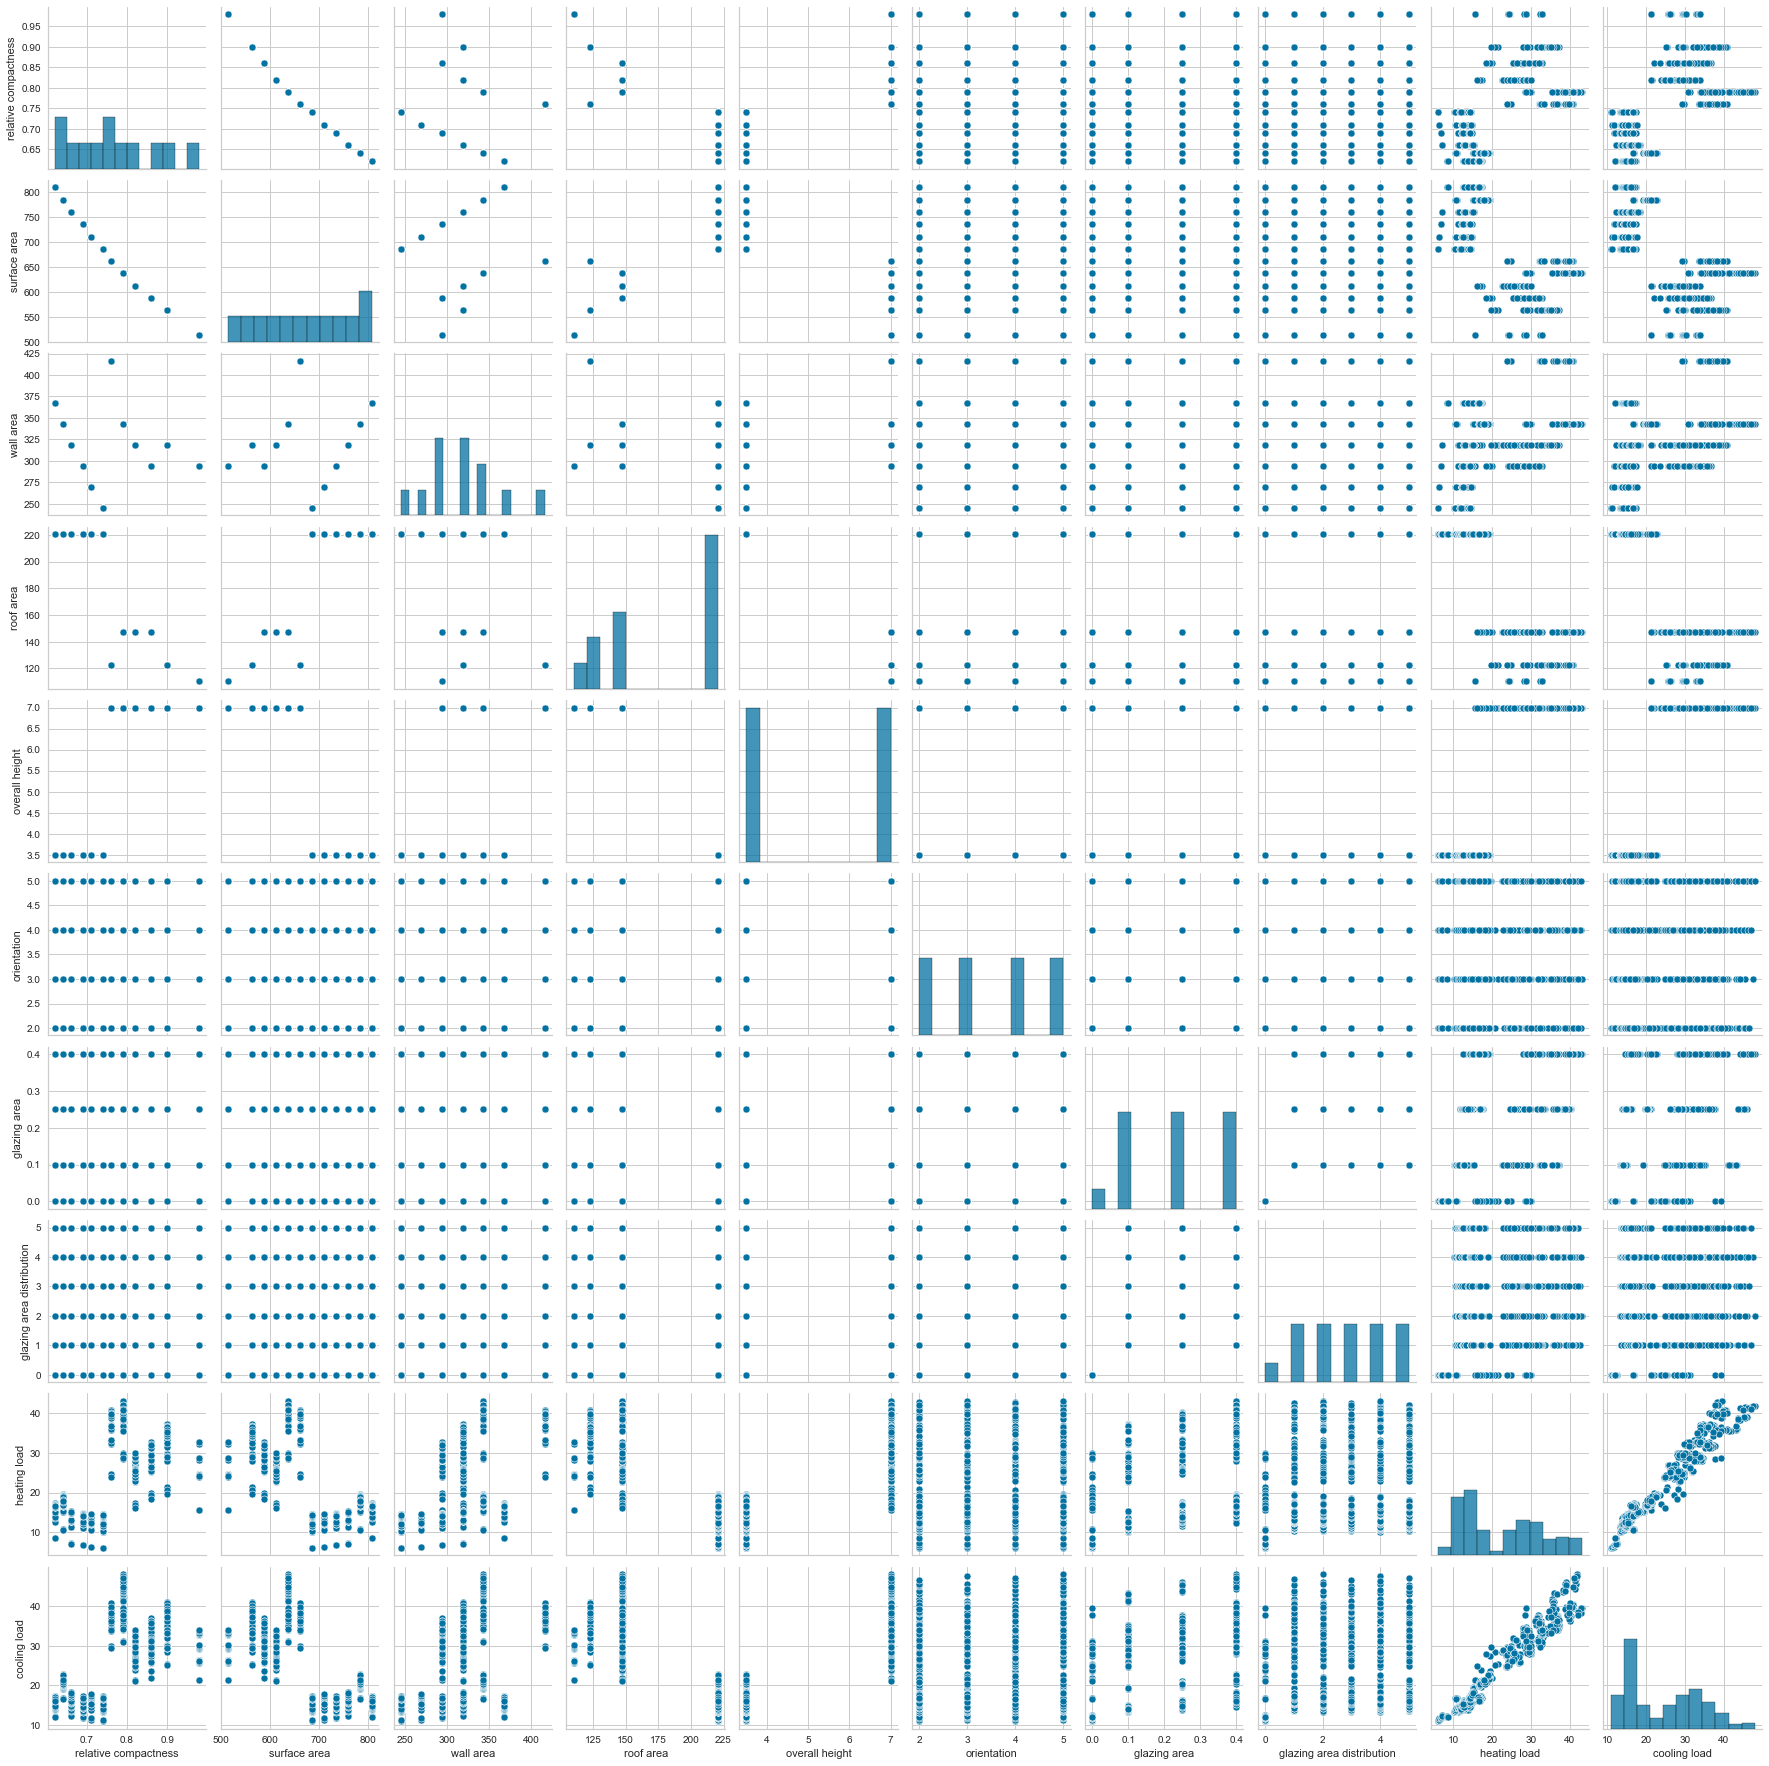

In [334]:
sns.pairplot(df)

### Ver correlação

In [335]:
target[0]

'cooling load'

In [336]:
df.corr()[target[0]].abs().sort_values(ascending=False)

cooling load                 1.000000
heating load                 0.975862
overall height               0.895785
roof area                    0.862547
surface area                 0.672999
relative compactness         0.634339
wall area                    0.427117
glazing area                 0.207505
glazing area distribution    0.050525
orientation                  0.014290
Name: cooling load, dtype: float64

In [337]:
import scipy as sp
kStat, kPvalue = sp.stats.kstest(rvs=y, cdf='norm')
print(kStat,kPvalue)

1.0 0.0


0.9999459884306744 0.0


array([[<AxesSubplot:title={'center':'cooling load'}>]], dtype=object)

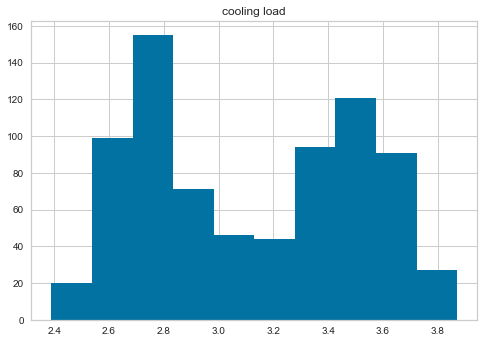

In [338]:
kStat, kPvalue = sp.stats.kstest(rvs=np.log(y), cdf='norm')
print(kStat,kPvalue)
y2=np.log(y)
y2.hist()

## Regressão

### Split dos dados e treinamento do modelo + R²

In [339]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)
model1 = LinearRegression().fit(X_train, y_train) #treinou
print(model1.score(X_test, y_test))
print(model1.score(X_train, y_train))



0.8719597129458824
0.8914953796767491


In [340]:
from sklearn import metrics
y24=model1.predict(X_test)
print('Rquadrado', metrics.r2_score(y_test, y24))
# note que da o mesmo valor que o calculado acima

Rquadrado 0.8719597129458824


### RMSE

In [341]:
y_pred1=model1.predict(X_test)

print(mean_squared_error(y_test,y_pred1))

11.918764470952661


In [342]:
y_pred1=model1.predict(X)

print(mean_squared_error(y,y_pred1))

10.142223600636294


### Gráfico dos resíduos

c:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.8719597129458824

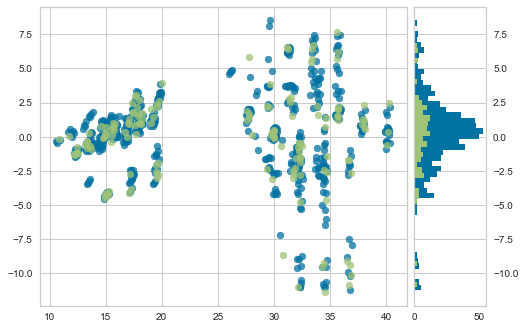

In [343]:
visualizer = ResidualsPlot(model1)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

Gráfico com x=valores preditos e y=valores reais

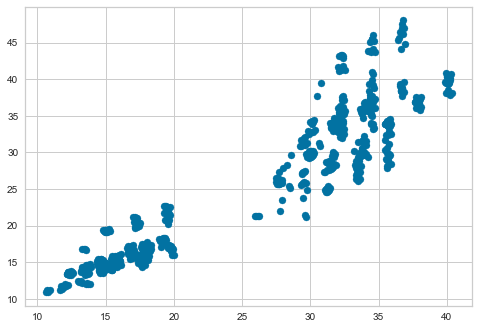

In [344]:
plt.scatter(y_pred1, y)

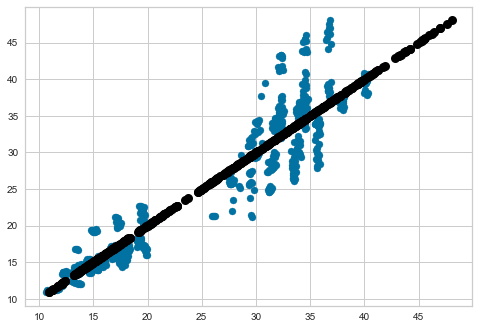

In [345]:
#aqui temos a visão do predito para o real, e o melhor modelo possível é mostrado na linha preta.
plt.scatter(y_pred1, y)
plt.scatter(y,y, color='black', lw=2)

In [346]:
x=pd.DataFrame(y-y_pred1) #residuos
x.head(3)

,cooling load
0,-4.608565
1,-4.702876
2,-4.797187


In [347]:
x['cooling load'][:3]

0   -4.608565
1   -4.702876
2   -4.797187
Name: cooling load, dtype: float64

(array([ 16.,  32.,  63., 231., 238., 109.,  45.,   3.,  10.,  21.]),
 array([-8.51406232, -6.52281227, -4.53156222, -2.54031217, -0.54906212,
         1.44218793,  3.43343799,  5.42468804,  7.41593809,  9.40718814,
        11.39843819]),
 <BarContainer object of 10 artists>)

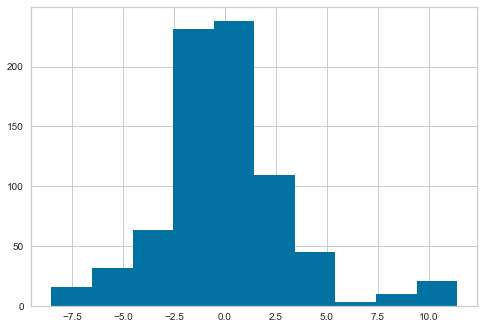

In [348]:
fig = plt.figure()
plt.hist(x['cooling load'])

In [349]:
import statsmodels.api as sm
stat, p = sp.stats.shapiro(x['cooling load'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# residuos não seguem uma distribuição normal


Statistics=0.932, p=0.000


c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cooling load'>

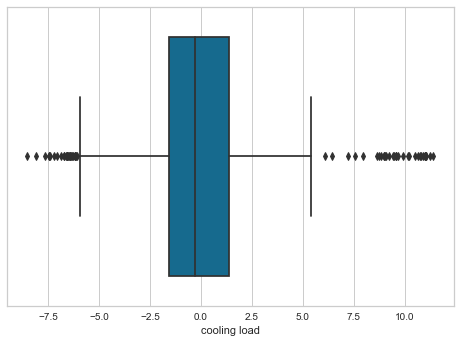

In [350]:
sns.boxplot(x['cooling load'])

### Estabelecer critério para outliers


In [351]:
df.describe(percentiles=[.1,.25,.50,.75,.90,.99])

,relative compactness,surface area,wall area,roof area,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
10%,0.640000,563.500000,269.500000,122.500000,3.50000,2.000000,0.100000,1.00000,11.217000,14.237000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
90%,0.900000,784.000000,367.500000,220.500000,7.00000,5.000000,0.400000,5.00000,36.703000,37.422000
99%,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,42.089900,45.543100


In [352]:
df2=df[df['cooling load']<39]
X, y = df2[features].values, df2[target].values

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cooling load'>

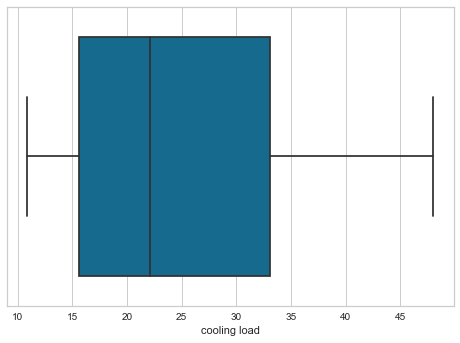

In [353]:
sns.boxplot(df['cooling load'])

In [354]:
df2.describe()

,relative compactness,surface area,wall area,roof area,overall height,orientation,glazing area,glazing area distribution,heating load,cooling load
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,0.762076,674.351332,315.132539,179.609397,5.115007,3.495091,0.228471,2.814867,21.027924,23.217546
std,0.109027,90.606002,42.360979,45.390657,1.746010,1.114406,0.132059,1.558576,9.286649,8.408015
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.660000,588.000000,294.000000,147.000000,3.500000,3.000000,0.100000,2.000000,12.880000,15.420000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.000000,0.250000,3.000000,16.990000,20.430000
75%,0.860000,759.500000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000,29.080000,31.060000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,42.770000,38.840000


### Treinamento dos dados sem outliers + R²

In [355]:
# df2=df[df['cooling load']<39]
# X, y = df2[features].values, df2[target].values

In [356]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

model2 = LinearRegression().fit(X_train, y_train)
print(model2.score(X_test, y_test))
print(model2.score(X_train, y_train))

0.9160689019025234
0.9204053219446675


RMSE

In [357]:
y_pred2=model2.predict(X_test)

print(mean_squared_error(y_test,y_pred2))

5.724272886406733


In [358]:
y_pred2=model2.predict(X)
print(mean_squared_error(y,y_pred2))

5.657978684906225


Plot dos resíduos

0.9160689019025234

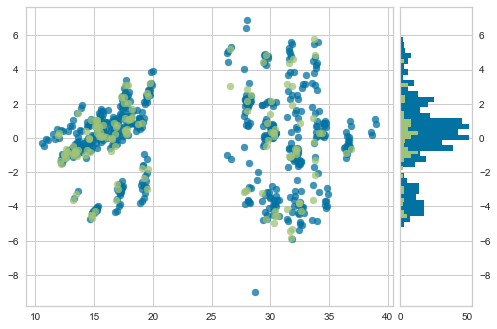

In [359]:
#Aqui tem o plot dos resíduos do modelo
visualizer = ResidualsPlot(model2)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

Gráfico com x=valores preditos e y=valores reais

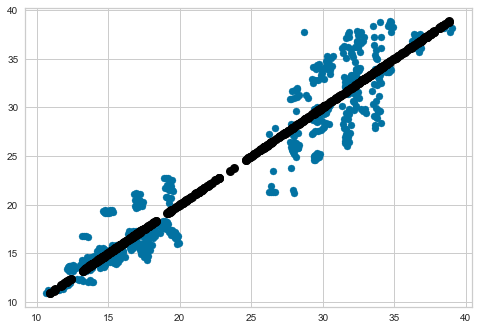

In [360]:
plt.scatter(y_pred2, y)
plt.scatter(y,y, color='black', lw=2)

Valor dos coeficientes da regressão com outliers

In [361]:
coef1=pd.DataFrame(model1.coef_,columns=features)
coef1.head()

,relative compactness,surface area,wall area,roof area,overall height,orientation,glazing area,glazing area distribution
0,-73.550527,-3.831069e+11,3.831069e+11,7.662138e+11,4.04493,0.094311,14.747385,0.050359


Valor dos coeficientes da regressão sem outliers

In [362]:
coef2=pd.DataFrame(model2.coef_,columns=features)
coef2.head()

,relative compactness,surface area,wall area,roof area,overall height,orientation,glazing area,glazing area distribution
0,-57.82389,-6.610872e+11,6.610872e+11,1.322174e+12,2.913208,0.133427,14.157459,0.058632


Conclusão

Ao comparar os modelos, temos que ao retirar os outliers, o RMSE caiu quase pela metade, o R² aumentou em ~2% e os gráficos dos resíduos ficaram mais simétricos e bem distribuídos. Observe que os coeficientes regressivos também mudam bastante, principalmente nas áreas de parede, teto e superfície. É claro que o modelo não está perfeito para ser utilizado, mas já conseguimos observar o processo e a consequência de retirar outliers de um modelo.